# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric" # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | bonthe
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | nehoiu
Processing Record 7 of Set 1 | chontalpa
Processing Record 8 of Set 1 | pastos bons
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | mutum biyu
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | alenquer
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | aleksandrov gay
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | buala
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | afaahiti
Processing Record 23 of Se

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,22.80,53,0,7.20,US,1730827157
1,bonthe,7.5264,-12.5050,29.72,65,5,4.05,SL,1730827179
2,west island,-12.1568,96.8225,26.99,83,100,7.20,CC,1730827201
3,kavaratti,10.5669,72.6420,27.81,77,5,2.31,IN,1730827223
4,tiksi,71.6872,128.8694,-13.47,76,100,6.56,RU,1730827246


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,22.80,53,0,7.20,US,1730827157
1,bonthe,7.5264,-12.5050,29.72,65,5,4.05,SL,1730827179
2,west island,-12.1568,96.8225,26.99,83,100,7.20,CC,1730827201
3,kavaratti,10.5669,72.6420,27.81,77,5,2.31,IN,1730827223
4,tiksi,71.6872,128.8694,-13.47,76,100,6.56,RU,1730827246


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

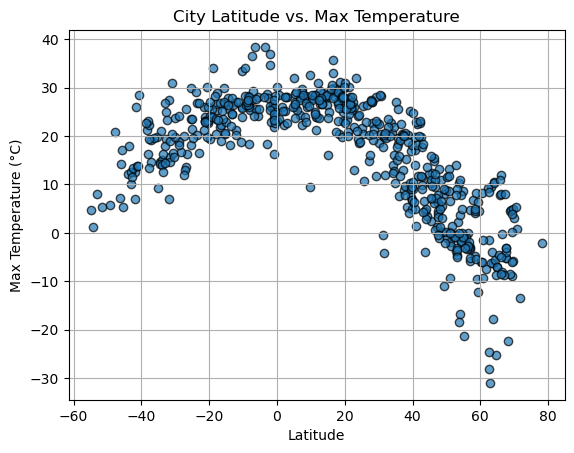

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.7)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

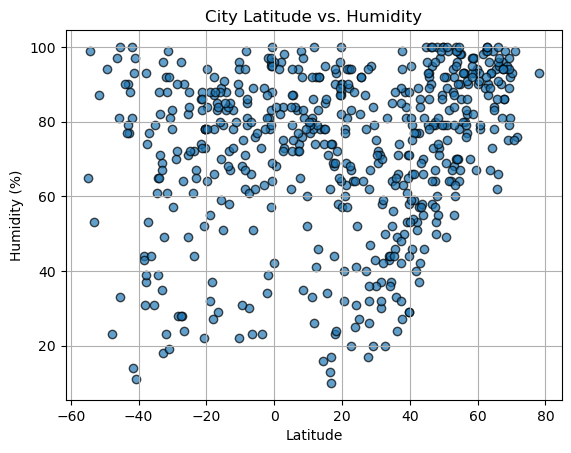

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.7)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

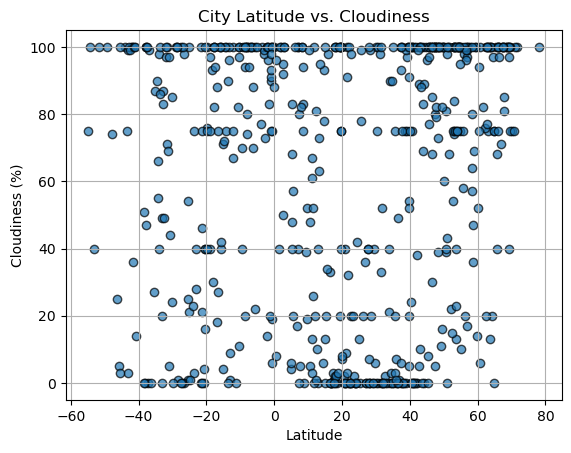

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

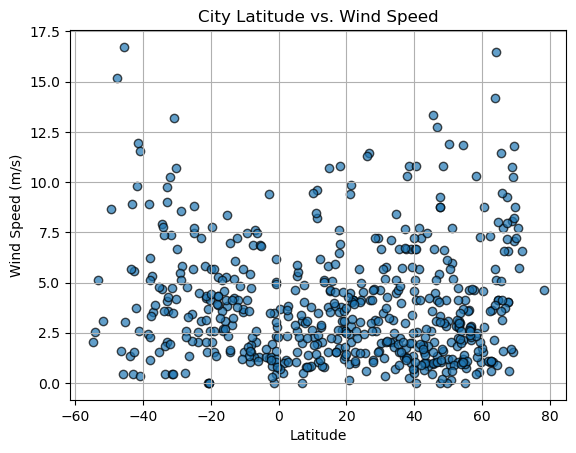

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()